# CNN-Copy1

In [1]:
from keras.datasets import cifar10
# MAC 一定要加入此行, 才不會把對方伺服器的 SSL 證書視為無效
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",
         5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

請輸入你想可視化的圖片 [0-49999]:14
你想可視化的圖片號碼是 14
圖片答案是 卡車


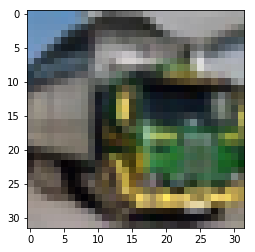

In [4]:
a = int(input("請輸入你想可視化的圖片 [0-49999]:"))
print("你想可視化的圖片號碼是", a)
print("圖片答案是", label[y_train[a][0]])
plt.imshow(x_train[a])

In [5]:
# 對特徵做出標準化，並且對目標做出 One-hot 編碼
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [6]:
# 這次我們真的遵照 VGG-16 的結構來構建卷積層，我們總共做了 6 次的卷積 (特徵萃取)，
# 三次的池化 (減少計算量)，最後在接上全連接層做出分類
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(filters=256,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(Conv2D(filters=256,
kernel_size=(3, 3),
activation='relu',
padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))
model.summary()

W0823 21:14:27.452054  1376 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 21:14:27.466018  1376 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 21:14:27.467985  1376 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 21:14:27.487931  1376 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is d

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)        

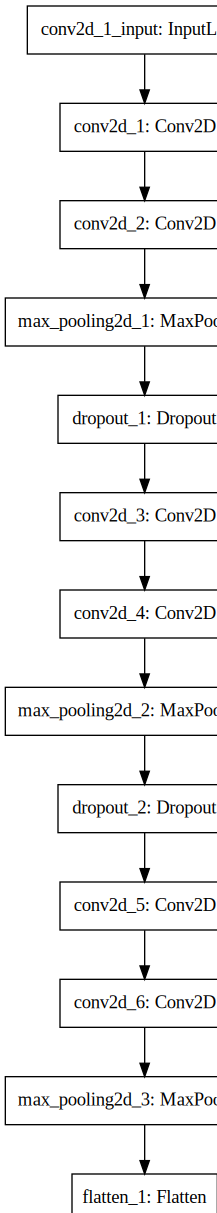

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                          validation_split = 0.1,
                          epochs = 25,
                          batch_size = 200,
                          verbose = 2)

W0823 21:25:46.033857  1376 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 21:25:46.050812  1376 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0823 21:25:46.112741  1376 deprecation.py:323] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 34s - loss: 1.7585 - acc: 0.3483 - val_loss: 1.3702 - val_acc: 0.4896
Epoch 2/25
 - 30s - loss: 1.2648 - acc: 0.5421 - val_loss: 1.0730 - val_acc: 0.6190
Epoch 3/25
 - 30s - loss: 1.0072 - acc: 0.6412 - val_loss: 0.8440 - val_acc: 0.7052
Epoch 4/25
 - 29s - loss: 0.8614 - acc: 0.6935 - val_loss: 0.7469 - val_acc: 0.7412
Epoch 5/25
 - 30s - loss: 0.7425 - acc: 0.7375 - val_loss: 0.6726 - val_acc: 0.7706
Epoch 6/25
 - 30s - loss: 0.6545 - acc: 0.7690 - val_loss: 0.7375 - val_acc: 0.7462
Epoch 7/25
 - 30s - loss: 0.5904 - acc: 0.7923 - val_loss: 0.6201 - val_acc: 0.7796
Epoch 8/25
 - 30s - loss: 0.5243 - acc: 0.8124 - val_loss: 0.5888 - val_acc: 0.7994
Epoch 9/25
 - 30s - loss: 0.4819 - acc: 0.8266 - val_loss: 0.5877 - val_acc: 0.7998
Epoch 10/25
 - 36s - loss: 0.4322 - acc: 0.8460 - val_loss: 0.5749 - val_acc: 0.8070
Epoch 11/25
 - 44s - loss: 0.3895 - acc: 0.8624 - val_loss: 0.5918 - val_acc: 0.8154
Epoch 12/25
 - 30s - loss

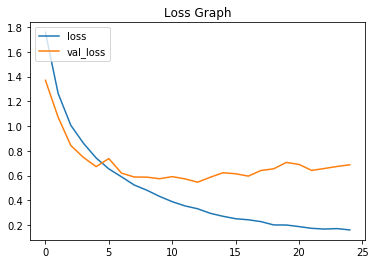

In [9]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [10]:
model.evaluate(x_test_shaped, y_test_cat)

10000/10000 [==============================] - 3s 285us/step


[0.71579971036911, 0.816]